In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #library to visualize missing data
import re#library for regular expression
import auto_ml as aml

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,RobustScaler,LabelEncoder,OneHotEncoder 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
#Function to read data to dataframe

def read_file_to_df(filepath):
    
    df = pd.DataFrame()#define an empty dataframe
    
    try:
        if filepath.endswith(".csv"):
            df = pd.read_csv(filepath)
            df_loaded_ind=True

        elif (filepath.endswith(".xls") | filepath.endswith(".xlsx")):
            df = pd.read_excel(filepath)
            df_loaded_ind=True

        else:
            print('Invalid file type')
            print('\n')
            df_loaded_ind = False
    except:
        print('Invalid file path')
        print('\n')
        df_loaded_ind = False
        
                
    return df_loaded_ind,df

In [3]:

while(True):
    filepath             = input('Please provide the file path for the data : ')
    print('\n')
    data_loaded_ind,data = read_file_to_df(filepath)
    if data_loaded_ind:
        print('Data is successfully loaded!!')
        break
    else:
        print('Error loading dataset!! Try again...')
    print('\n')


Please provide the file path for the data : C:/Users/sushant_singh01/Documents/Python Scripts/Data/ETA Data_V1.xlsx


Data is successfully loaded!!


In [4]:
print('Take a quick look at your data...\n')
data.head()


Take a quick look at your data...



,URN,NMSC,SUPP,CS_HUB,SFX_CD,PKG_MTH,SSN,SAL_KATASHI,FSHUB_LDTIM,CO_TIMESTP,...,ATA_FINAL_VESSEL,TIMESTP_MPC,TSA_CALC_FLG_MPC,ETA_MPC,TIMESTP_LCP,TSA_CALC_FLG_LCP,ETA_LCP,TIMESTP_ARR,TSA_CALC_FLG_ARR,ETA_ARR
0,URN0000001,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0.0,2018-07-02-16.07.13.624406,...,21.08.2017,2017-04-20-00.00.00.000000,N,16.10.2017,2018-05-24-09.08.14.000000,N,11.09.2017,2018-05-24-13.13.57.000000,N,11.09.2017
1,URN0000002,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0.0,2018-07-02-16.08.20.114863,...,21.08.2017,2017-04-20-00.00.00.000000,N,17.10.2017,2018-05-24-12.17.35.000000,N,11.09.2017,2018-05-25-10.52.43.000000,N,11.09.2017
2,URN0000003,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0.0,2018-07-02-16.08.23.481544,...,21.08.2017,2017-04-20-00.00.00.000000,N,17.10.2017,2018-05-24-09.08.14.000000,N,11.09.2017,2018-05-24-13.13.57.000000,N,11.09.2017
3,URN0000004,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0.0,2018-07-02-16.09.27.253373,...,21.08.2017,2017-04-20-00.00.00.000000,N,18.10.2017,2018-05-24-12.17.35.000000,N,11.09.2017,2018-05-25-10.52.43.000000,N,11.09.2017
4,URN0000005,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0.0,2018-07-06-10.14.43.473155,...,21.08.2017,2017-04-20-00.00.00.000000,N,18.10.2017,2018-05-24-09.08.14.000000,N,11.09.2017,2018-05-24-13.13.57.000000,N,11.09.2017


In [5]:
before_dup_row = data.shape[0]
print("Checking for duplicate rows in the data and dropping if any...")
print("\n")
data.drop_duplicates(inplace=True)
after_dup_row = data.shape[0]
dropped_row_count=(before_dup_row - after_dup_row)
if dropped_row_count > 0:
    print("{} duplicate rows were dropped...".format(dropped_row_count))
else:
    print("No duplicate entries found!")

Checking for duplicate rows in the data and dropping if any...


No duplicate entries found!


In [6]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            iv = vs.iloc[:,i].tolist()
            for j in range(i+1, lcs):
                jv = vs.iloc[:,j].tolist()
                if iv == jv:
                    dups.append((cs[i],cs[j]))
                    break

    return dups

In [7]:
print("Checking for duplicate columns in the data and dropping if any..")
print('\n')
dup_cols_pair=duplicate_columns(data)
if dup_cols_pair:
    print("Here is the list of duplicate columns pair : ",dup_cols_pair)
    print('\n')
    print("Dropping first column of all duplicate columns pairs..")
    print('\n')
    dup_col_drop=list(set([i[0] for i in dup_cols_pair]))
    data.drop(dup_col_drop,axis=1,inplace=True)
    print("Here is the list of columns that were dropped : ",dup_col_drop)
    print("\n")
    print("Remaining columns in the dataset are : ",data.columns.tolist())
else:
    print("No duplicate columns found!")


Checking for duplicate columns in the data and dropping if any..


Here is the list of duplicate columns pair :  [('CO_TIMESTP', 'ETA_AT_CO_ORIG_TSP')]


Dropping first column of all duplicate columns pairs..


Here is the list of columns that were dropped :  ['CO_TIMESTP']


Remaining columns in the dataset are :  ['URN', 'NMSC', 'SUPP', 'CS_HUB', 'SFX_CD', 'PKG_MTH', 'SSN', 'SAL_KATASHI', 'FSHUB_LDTIM', 'HO_CS_TIMSTP', 'PDI_COMP_TIMESTP', 'LCP_TIMESTP', 'DLR_ATA_TIMESTP', 'DRD_TC_COD', 'DLR_LOC_COD', 'MODEL_NAME', 'MAX_PPO_LEADTIME', 'TRANSPORT_LEADTIME', 'ETA_AT_CO_ORIG', 'ETA_AT_CO_ORIG_TSP', 'RDD_TYPE', 'MAX_FROZ_TIMESTP', 'CO_SHEDULE_DATE', 'ETA_BEFORE_FRZ', 'ETA_BEFORE_FRZ_TSP', 'ETD_FINAL_VESSEL', 'ETA_FINAL_VESSEL', 'ATD_FINAL_VESSEL', 'ATA_FINAL_VESSEL', 'TIMESTP_MPC', 'TSA_CALC_FLG_MPC', 'ETA_MPC', 'TIMESTP_LCP', 'TSA_CALC_FLG_LCP', 'ETA_LCP', 'TIMESTP_ARR', 'TSA_CALC_FLG_ARR', 'ETA_ARR']


In [8]:
print('The data types of every feature are as follows:\n')

g = data.columns.to_series().groupby(data.dtypes).groups
{k.name: v for k, v in g.items()}


The data types of every feature are as follows:



{'int64': Index(['SUPP', 'PKG_MTH', 'MAX_PPO_LEADTIME', 'TRANSPORT_LEADTIME',
        'RDD_TYPE'],
       dtype='object'),
 'float64': Index(['FSHUB_LDTIM'], dtype='object'),
 'object': Index(['URN', 'NMSC', 'CS_HUB', 'SFX_CD', 'SSN', 'SAL_KATASHI', 'HO_CS_TIMSTP',
        'PDI_COMP_TIMESTP', 'LCP_TIMESTP', 'DLR_ATA_TIMESTP', 'DRD_TC_COD',
        'DLR_LOC_COD', 'MODEL_NAME', 'ETA_AT_CO_ORIG', 'ETA_AT_CO_ORIG_TSP',
        'MAX_FROZ_TIMESTP', 'CO_SHEDULE_DATE', 'ETA_BEFORE_FRZ',
        'ETA_BEFORE_FRZ_TSP', 'ETD_FINAL_VESSEL', 'ETA_FINAL_VESSEL',
        'ATD_FINAL_VESSEL', 'ATA_FINAL_VESSEL', 'TIMESTP_MPC',
        'TSA_CALC_FLG_MPC', 'ETA_MPC', 'TIMESTP_LCP', 'TSA_CALC_FLG_LCP',
        'ETA_LCP', 'TIMESTP_ARR', 'TSA_CALC_FLG_ARR', 'ETA_ARR'],
       dtype='object')}

Plotting the features with integer data types..


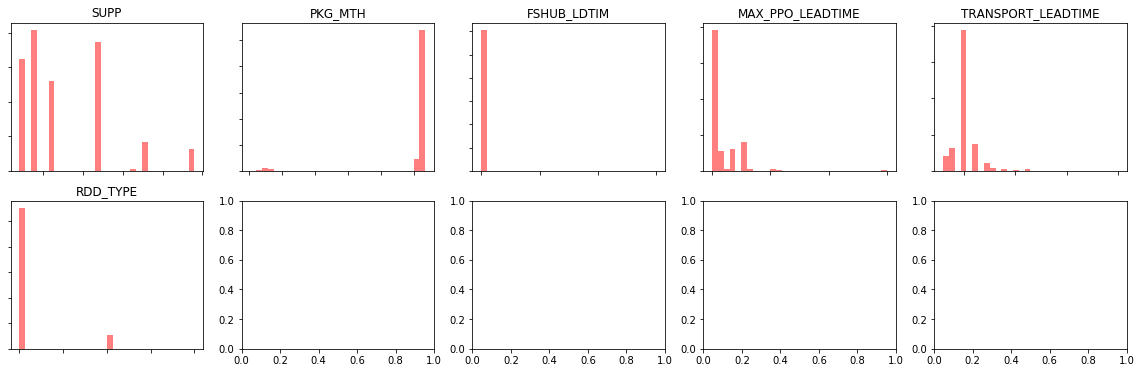

In [9]:
data_int = data.select_dtypes(include=['int64','int32','float64','float32'])
int_columns = data_int.columns.tolist()
print('Plotting the features with integer data types..')
no_cols = 5
no_rows = int(np.ceil(len(int_columns) / no_cols))
fig, axes = plt.subplots(ncols=no_cols,nrows=no_rows, figsize=(20,3*no_rows))
axes = axes.flatten()

for i in range(len(int_columns)):#(no_rows*no_cols):
    axes[i].hist(data_int[int_columns[i]].dropna(), bins=30,facecolor='r',alpha=0.5)
    axes[i].set_title(int_columns[i])
    plt.setp(axes[i].get_xticklabels(), visible=False)
    plt.setp(axes[i].get_yticklabels(), visible=False)


In [10]:
#Function to validate column names
def validate_columns(df,columnlist):
    
    invalid_columns = []
    if columnlist:
        invalid_columns = [col for col in columnlist if col not in df.columns.tolist()]
                
    return invalid_columns

In [11]:
#Function to convert datatype of mentioned columns to corresponding mentioned types
def data_type_converter(df,column_names=[],to_types=[]):
    
    if (isinstance(column_names, list) & isinstance(to_types, list)):#check if passed item is in list format

        for col,typ in zip(column_names,to_types):
            if typ == 'datetime64[ns]':
                try:
                    df[col] = df[col].astype(typ)
                except:
                    invalid_frmt=True
                    while(invalid_frmt==True):
                        print("Unable to convert {} to datetime format".format(col))
                        frmt=input('Please specify the format of {} feature'.format(col))
                        print("\n")
                        try:
                            input_taken=False
                            for i in range(len(df[col])):
                                if df[col][i].startswith('0000'):
                                    if (input_taken==False):
                                        print("Some of the values in {} starts with '0000' which is invalid!\n".format(col))
                                        rep_val=input("Please enter a date in the same format as {} to replace values that start with '0000'".format(col))
                                        input_taken=True
                                    df[col][i] = df[col][i].replace(df[col][i],rep_val)

                            df[col]=pd.to_datetime(data[col], format=frmt)
                            invalid_frmt=False
                        except Exception as e:
                            print(e)
                            #print("Oops!! Invalid format entered")
            else:
                df[col] = df[col].astype(typ)

    return df

In [12]:
print('Please make sure that all the features are in int/float/string/category/boolean/timestamp format')
print('\n')
print("Please note that accepted type for all date/timestamp feature conversion is : 'datetime64[ns]'\n")
print("Example for date format: If your date is '2018-07-02-16.07.13.624406',format should be '%Y-%m-%d-%H.%M.%S.%f'")
print('\n')
type_change_ind = (input('Would you like to change the data type of any feature?-Y/N')).upper()
print('\n')
if type_change_ind == 'Y':
    while(True):
        cols_for_type_change=[]
        to_type_list=[]
        print('Enter the features for which you wish to change the data types, separated by comma')
        cols_for_type_change = [x for x in input().split(',')]
        print('\n')
        invalid_col_names = validate_columns(data,columnlist = cols_for_type_change)
        if invalid_col_names:
            print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
            print('Please verify..')
            print('\n')
        else:
            before_data_type = data[cols_for_type_change].dtypes.tolist()
            break 
    print('Enter the type to which you would like to change the data types, in the same sequence as the features, separated by comma')
    to_type_list         = [x for x in input().split(',')]
    print('\n')
    data = data_type_converter(data,column_names=cols_for_type_change,to_types=to_type_list)
    after_data_type = data[cols_for_type_change].dtypes.tolist()
    print('The changed data types are as follows :\n') 
    display(pd.DataFrame(list(zip(cols_for_type_change, before_data_type, after_data_type)),columns=['Features','Before', 'After']))


Please make sure that all the features are in int/float/string/category/boolean/timestamp format


Please note that accepted type for all date/timestamp feature conversion is : 'datetime64[ns]'

Example for date format: If your date is '2018-07-02-16.07.13.624406',format should be '%Y-%m-%d-%H.%M.%S.%f'


Would you like to change the data type of any feature?-Y/NY


Enter the features for which you wish to change the data types, separated by comma
SUPP,PKG_MTH,FSHUB_LDTIM,MAX_PPO_LEADTIME,TRANSPORT_LEADTIME,RDD_TYPE,HO_CS_TIMSTP,PDI_COMP_TIMESTP,LCP_TIMESTP,DLR_ATA_TIMESTP,ETA_AT_CO_ORIG,MAX_FROZ_TIMESTP,CO_SHEDULE_DATE,ETA_BEFORE_FRZ,ETA_BEFORE_FRZ_TSP,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATD_FINAL_VESSEL,ATA_FINAL_VESSEL,TIMESTP_MPC,ETA_MPC,TIMESTP_LCP,ETA_LCP,ETA_ARR,TIMESTP_ARR


Enter the type to which you would like to change the data types, in the same sequence as the features, separated by comma
object,object,object,object,object,object,datetime64[ns],datetime64[ns],datetime64[ns]

,Features,Before,After
0,SUPP,int64,object
1,PKG_MTH,int64,object
2,FSHUB_LDTIM,float64,object
3,MAX_PPO_LEADTIME,int64,object
4,TRANSPORT_LEADTIME,int64,object
5,RDD_TYPE,int64,object
6,HO_CS_TIMSTP,object,datetime64[ns]
7,PDI_COMP_TIMESTP,object,datetime64[ns]
8,LCP_TIMESTP,object,datetime64[ns]
9,DLR_ATA_TIMESTP,object,datetime64[ns]


In [13]:
#Function to get the ratio of null values in columns of dataset in descending order
def get_null_count(df):
   
    na_count=df.isnull().sum().sort_values(ascending=False)/len(df)#columnwise ratio of null values
    na_count=na_count[na_count>0]#choose only the columns whic have null values

    return na_count
        

In [14]:
#Function to visualize the null value distribution
def visualize_null_count(df,null_count):

    filtered_data = msno.nullity_filter(df,  filter='bottom',n=len(null_count))
    msno.matrix(filtered_data,labels=True,figsize=(35, 15))
        

In [15]:
#input('Press enter to continue ...')
print('\n')
print('Checking for null values in the dataset...')
print('\n')
if data.isnull().values.any():
    null_count = get_null_count(data)
    print('Below are the features that contain null values :\n', null_count)
    visualize_null_count(data,null_count)
    plt.show()
else:
    print('There is not any null value in the dataset!!')

input('Press enter to continue')



Checking for null values in the dataset...


There is not any null value in the dataset!!
Press enter to continue


''

In [16]:
#Function to drop desired columns
def drop_columns(df,columnlist=[]):
    if columnlist:
        df.drop(columnlist,axis=1,inplace=True)#Drop all the columns in the list
    return df

In [18]:

drop_col_ind = (input('Would you like to drop any feature?-Y/N')).upper()
print('\n')
if drop_col_ind == 'Y':
    while(True):
        drop_null_column_list = []
        print('Enter the features you wish to drop, separated by comma :')
        drop_null_column_list = [x for x in input().split(',')]
        print('\n')

        if drop_null_column_list:
            invalid_col_names = validate_columns(data,columnlist = drop_null_column_list)
            if invalid_col_names:
                print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
                print('Please verify..')
                print('\n')
            else:
                break 

    data = drop_columns(data,columnlist=drop_null_column_list)
    print('Specified features are successfully dropped...')
    print('\n')
    print('Existing features in the dataset are: ', data.columns.tolist())
    print('\n')
    input('Press enter to continue')

Would you like to drop any feature?-Y/NY


Enter the features you wish to drop, separated by comma :
URN


Specified features are successfully dropped...


Existing features in the dataset are:  ['NMSC', 'SUPP', 'CS_HUB', 'SFX_CD', 'PKG_MTH', 'SSN', 'SAL_KATASHI', 'FSHUB_LDTIM', 'HO_CS_TIMSTP', 'PDI_COMP_TIMESTP', 'LCP_TIMESTP', 'DLR_ATA_TIMESTP', 'DRD_TC_COD', 'DLR_LOC_COD', 'MODEL_NAME', 'MAX_PPO_LEADTIME', 'TRANSPORT_LEADTIME', 'ETA_AT_CO_ORIG', 'ETA_AT_CO_ORIG_TSP', 'RDD_TYPE', 'MAX_FROZ_TIMESTP', 'CO_SHEDULE_DATE', 'ETA_BEFORE_FRZ', 'ETA_BEFORE_FRZ_TSP', 'ETD_FINAL_VESSEL', 'ETA_FINAL_VESSEL', 'ATD_FINAL_VESSEL', 'ATA_FINAL_VESSEL', 'TIMESTP_MPC', 'TSA_CALC_FLG_MPC', 'ETA_MPC', 'TIMESTP_LCP', 'TSA_CALC_FLG_LCP', 'ETA_LCP', 'TIMESTP_ARR', 'TSA_CALC_FLG_ARR', 'ETA_ARR']


Press enter to continue


In [17]:
#Function to impute missing values
def impute_missing(df, drop_nans):  

    #drop the rows containing null values if drop_nans is set to True
    if drop_nans:
        df.dropna(inplace=True)
    else:
        null_features = get_null_count(df).index.tolist()
        print("Here is the list of features containing null values : \n",null_features)
        print("\n")
        print("For each of these features, please specify how you would like to impute missing values,separated by commas in the same order as the above list\n")
        print("You can enter 'mean' to replace missing values with mean of the feature, 'mode' to replace with mode or 'others' to replace with desired value.\n")
        print("NOTE :\n")
    
        for i,j in zip(null_features,df[null_features].dtypes):
            print("Datatype of {} : {}".format(i,j))
        
        imputation = [x for x in input().split(',')]
        print("\n")
        print("Imputing missing values...")
        print("\n") 
        for col,imp in zip(null_features,imputation):
            if imp == 'mean':
                column_median = df[col].median()
                df[col].fillna(column_median, inplace=True)
            elif imp == 'mode':
                column_mode = df[col].mode()[0]
                df[col].fillna(column_mode, inplace=True)
            elif imp == 'others':
                prev_type=df[col].dtype
                print("For {} :".format(col))
                imp_oth = input(" Please specify the value to replace null values : ")
                print("\n") 
                df[col].fillna(imp_oth, inplace=True)
                after_type=df[col].dtype
                if (prev_type != after_type):
                    df[col] = df[col].astype(prev_type)
                    

                
    if df.isnull().values.any():
        print('Error in replacing/dropping missing data!!')
    else:
        if drop_nans:
            print('Missing values are successfully dropped!!')   
        else:
            print('Missing values are successfully replaced!!')
    
    return df
    

In [19]:
if data.isnull().values.any():
    drop_na_rows = (input('Do you wish to drop all rows with null values?-Y/N')).upper()
    print('\n')
    drop_nans = False
    if drop_na_rows == 'Y':
        drop_nans = True

    data = impute_missing(data, drop_nans=drop_nans)
    
    print('\n')
    input('Press enter to continue')


In [21]:
#Function to separate data and target variable 
def separate_target(df_raw,target_name):
    
    target             = df_raw[target_name]#target variable 
    df                 = df_raw.drop(target_name,axis=1)#data without target variable
    target_is_separate = True
      
    return df,target,target_is_separate


In [20]:
def separate_cont_and_cat_features(df):
    
    categorical_features = df.select_dtypes(include=['object','bool','category']).columns.tolist()
    continuous_features  = df.select_dtypes(include=['number']).columns.tolist()
    date_features        = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    
    return continuous_features,categorical_features,date_features
    

In [22]:
#Function to splite timestamp/date column into sub features
def date_splitter(df, fldname):
    
    #convert the specified feature to timestamp format if not already
    fld = df[fldname] 
    #if not np.issubdtype(fld.dtype, np.datetime64):
        #df[fldname] = fld = pd.to_datetime(fld,infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)#substitute the phrase 'date' by spaces in the original field name
    
    #obtain different sub features for the date column
    for n in ('Year', 'Month',  'Day', 'Hour' ,'Minute','Second'):
        #if n in ['Hour' ,'Minute','Seconds']:
        df[targ_pre+n] = getattr(fld.dt,n.lower())
        if n in ['Hour' ,'Minute','Second']:
            if any(df[targ_pre+n] > 0):
                #df[targ_pre+n]=df[targ_pre+n].astype('str')    
                df[targ_pre+n]=df[targ_pre+n].astype('category')
            else:
                df.drop(targ_pre+n,axis=1,inplace=True)
        else:
            df[targ_pre+n]=df[targ_pre+n].astype('str')    
            df[targ_pre+n]=df[targ_pre+n].astype('category')

    return df

In [23]:
#Function to convert date field to its Julian format
def Juliandtconv(df,fldname):
    
    #convert the specified feature to timestamp format if not already
    #df[fldname]=pd.to_datetime(df[fldname],infer_datetime_format=True)
    
    df[fldname] = df[fldname].apply(lambda x: x.to_julian_date())#convert to julian format
            
    return  df

In [24]:
#Function to concatenate data and target variable 
def concatenate_target(df,target):
    target_is_separate=False
    return (pd.concat([df,target],axis=1)),target_is_separate


In [25]:
target_name    = input('Please enter the target feature :')
while(True):
    invalid_target_name = validate_columns(data,columnlist = [target_name])
    if invalid_target_name:
        target_name = input('Please verify the target feature and re-enter :')
    else:
        break 

Please enter the target feature :TIMESTP_ARR


In [26]:

continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if date_features:
    print("Transforming date features in the data...")
    print('\n')
    print("The date features in the dataset are : ", date_features)
    print('\n')
    
    first_dt_feature=True
    
    for i in date_features:
                  
        
        if i == target_name:
            split_or_julian_ind=''
            print("Please specify whether you would like to convert the target feature,{} to Julian format or retain as it is".format(i))
            while(split_or_julian_ind != 'J' and split_or_julian_ind != 'R'):
                split_or_julian_ind=(input("Enter J to convert to Julian or R to retain existing date format : ")).upper()
            print("\n")
            if split_or_julian_ind == 'J':
                data = Juliandtconv(data,fldname=i)
            elif split_or_julian_ind == 'R':
                pass
        else:
            if first_dt_feature:
                first_dt_feature = False
                allind=(input("Would you like to split all date feaures or convert all date features to Julian format? - Y/N")).upper()
                if allind == 'Y':
                    split_or_julian_ind=''
                    while(split_or_julian_ind != 'S' and split_or_julian_ind != 'J'):
                        split_or_julian_ind=(input("Enter S to split, J to convert to Julian format : ")).upper()
                        print("\n")
            if allind != 'Y': 
                print("Please specify whether you would like to split {} or convert it to Julian format ".format(i))
                split_or_julian_ind=''
                while(split_or_julian_ind != 'S' and split_or_julian_ind != 'J'):
                    split_or_julian_ind=(input("Enter S to split, J to convert to Julian format : ")).upper()
                    print("\n")
            if split_or_julian_ind == 'S':
                data = date_splitter(data, fldname=i)
                data.drop(i,axis=1,inplace=True)
            elif split_or_julian_ind == 'J':
                data = Juliandtconv(data,fldname=i)


    print('\n')            
    print('Date tarnsformed data:\n')
    display(data.head())


Transforming date features in the data...


The date features in the dataset are :  ['HO_CS_TIMSTP', 'PDI_COMP_TIMESTP', 'LCP_TIMESTP', 'DLR_ATA_TIMESTP', 'ETA_AT_CO_ORIG', 'MAX_FROZ_TIMESTP', 'CO_SHEDULE_DATE', 'ETA_BEFORE_FRZ', 'ETA_BEFORE_FRZ_TSP', 'ETD_FINAL_VESSEL', 'ETA_FINAL_VESSEL', 'ATD_FINAL_VESSEL', 'ATA_FINAL_VESSEL', 'TIMESTP_MPC', 'ETA_MPC', 'TIMESTP_LCP', 'ETA_LCP', 'TIMESTP_ARR', 'ETA_ARR']


Would you like to split all date feaures or convert all date features to Julian format? - Y/NY
Enter S to split, J to convert to Julian format : J


Please specify whether you would like to convert the target feature,TIMESTP_ARR to Julian format or retain as it is
Enter J to convert to Julian or R to retain existing date format : J




Date tarnsformed data:



,NMSC,SUPP,CS_HUB,SFX_CD,PKG_MTH,SSN,SAL_KATASHI,FSHUB_LDTIM,HO_CS_TIMSTP,PDI_COMP_TIMESTP,...,ATA_FINAL_VESSEL,TIMESTP_MPC,TSA_CALC_FLG_MPC,ETA_MPC,TIMESTP_LCP,TSA_CALC_FLG_LCP,ETA_LCP,TIMESTP_ARR,TSA_CALC_FLG_ARR,ETA_ARR
0,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0,2.458263e+06,2.458305e+06,...,2457986.5,2457863.5,N,2458042.5,2.458263e+06,N,2458066.5,2.458263e+06,N,2458066.5
1,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0,2.458264e+06,2.458305e+06,...,2457986.5,2457863.5,N,2458043.5,2.458263e+06,N,2458066.5,2.458264e+06,N,2458066.5
2,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0,2.458263e+06,2.458305e+06,...,2457986.5,2457863.5,N,2458043.5,2.458263e+06,N,2458066.5,2.458263e+06,N,2458066.5
3,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0,2.458264e+06,2.458305e+06,...,2457986.5,2457863.5,N,2458044.5,2.458263e+06,N,2458066.5,2.458264e+06,N,2458066.5
4,94081,9,DY,H2,201705,1Y,GUN125R-CNFSHW,0,2.458263e+06,2.458316e+06,...,2457986.5,2457863.5,N,2458044.5,2.458263e+06,N,2458066.5,2.458263e+06,N,2458066.5


In [27]:
#Convert categorical features to numerical
def encoding(df,categorical_features):
    
    df_cat = df[categorical_features]
    #By defaault, convert all the categories to numerical forms using Label encoder
    le = {}
    for i in range(len(df_cat.columns.tolist())):
        le[i] = LabelEncoder()
        df_cat.iloc[:,i] = le[i].fit_transform(df_cat.iloc[:,i].astype(str))

    return df_cat

In [28]:
#if target_is_separate_ind:
#    data,target_is_separate_ind       = concatenate_target(data,target)
continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if categorical_features:
    print('Here is the list of categorical features in the dataset:\n', categorical_features)
    print('\n')
    print('Encoding all categorical featues as numerical...')
    print('\n')
    encoded_data  = encoding(data,categorical_features)
    data          = pd.concat([encoded_data,data[continuous_features+date_features]],axis=1)
    print('Encoded data looks like this: \n',data.head())
    

Here is the list of categorical features in the dataset:
 ['NMSC', 'SUPP', 'CS_HUB', 'SFX_CD', 'PKG_MTH', 'SSN', 'SAL_KATASHI', 'FSHUB_LDTIM', 'DRD_TC_COD', 'DLR_LOC_COD', 'MODEL_NAME', 'MAX_PPO_LEADTIME', 'TRANSPORT_LEADTIME', 'ETA_AT_CO_ORIG_TSP', 'RDD_TYPE', 'TSA_CALC_FLG_MPC', 'TSA_CALC_FLG_LCP', 'TSA_CALC_FLG_ARR']


Encoding all categorical featues as numerical...


Encoded data looks like this: 
    NMSC  SUPP  CS_HUB  SFX_CD  PKG_MTH  SSN  SAL_KATASHI  FSHUB_LDTIM  \
0     3     6       0     492        4    6           41            0   
1     3     6       0     492        4    6           41            0   
2     3     6       0     492        4    6           41            0   
3     3     6       0     492        4    6           41            0   
4     3     6       0     492        4    6           41            0   

   DRD_TC_COD  DLR_LOC_COD    ...      ETD_FINAL_VESSEL  ETA_FINAL_VESSEL  \
0           4         1296    ...             2457965.5         2457984.5   


In [30]:
input('Press enter to see the description of your data')
data.describe().T

Press enter to see the description of your data


,count,mean,std,min,25%,50%,75%,max
NMSC,30380.0,1.062709e+01,6.490669,0.000000e+00,4.000000e+00,1.100000e+01,1.600000e+01,2.200000e+01
SUPP,30380.0,2.421593e+00,1.665067,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00
CS_HUB,30380.0,3.501745e+00,2.000271,0.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
SFX_CD,30380.0,3.421298e+02,251.096105,0.000000e+00,1.550000e+02,2.910000e+02,5.130000e+02,8.790000e+02
PKG_MTH,30380.0,1.592074e+01,1.834302,0.000000e+00,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01
SSN,30380.0,1.369266e+01,8.263588,0.000000e+00,3.000000e+00,1.400000e+01,2.200000e+01,2.900000e+01
SAL_KATASHI,30380.0,1.780346e+02,106.020840,0.000000e+00,5.700000e+01,1.990000e+02,2.760000e+02,2.820000e+02
FSHUB_LDTIM,30380.0,1.843318e-03,0.048648,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
DRD_TC_COD,30380.0,1.071616e+01,6.783338,0.000000e+00,6.000000e+00,8.000000e+00,1.700000e+01,2.300000e+01
DLR_LOC_COD,30380.0,8.390698e+02,477.666374,0.000000e+00,4.560000e+02,7.780000e+02,1.237000e+03,1.791000e+03


In [29]:
#Function to bring all data into same scale
def scale_data(df,scaling_type):  
    
    if scaling_type == 'MinMax':
        scaler = MinMaxScaler()#scales based on minimum and maximum values in dataset
        
    if scaling_type == 'Standardize':
        scaler = StandardScaler()#scales based on mean and standard deviation of dataset setting mean to 0 and standard deviation to 1
        
    if scaling_type == 'Robustscale':
        scaler = RobustScaler()#scales based on interquartile range of data

    return pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [31]:
scaling_method = input('Please choose the scaling method: MinMax/Standardize/Robustscale')
print('\n')

data,target,target_is_separate_ind                     = separate_target(data,target_name)

if scaling_method in ['Standardize', 'Robustscale','MinMax']:
    scale      = scaling_method
else:
    print('Invalid scaling method chosen. By default, data is scaled using Min-Max scaler')
    print('\n')
    scale      = 'MinMax'

data,target_is_separate_ind       = concatenate_target(scale_data(data,scaling_type= scale),target)

print('Scaled data :\n')
data.head()


Please choose the scaling method: MinMax/Standardize/Robustscale


Invalid scaling method chosen. By default, data is scaled using Min-Max scaler


Scaled data :



C:\Users\sushant_singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,NMSC,SUPP,CS_HUB,SFX_CD,PKG_MTH,SSN,SAL_KATASHI,FSHUB_LDTIM,DRD_TC_COD,DLR_LOC_COD,...,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATD_FINAL_VESSEL,ATA_FINAL_VESSEL,TIMESTP_MPC,ETA_MPC,TIMESTP_LCP,ETA_LCP,ETA_ARR,TIMESTP_ARR
0,0.136364,1.0,0.0,0.559727,0.222222,0.206897,0.14539,0.0,0.173913,0.723618,...,0.291248,0.320458,0.291248,0.323319,0.220837,0.400000,0.885001,0.433718,0.433718,2.458263e+06
1,0.136364,1.0,0.0,0.559727,0.222222,0.206897,0.14539,0.0,0.173913,0.739252,...,0.291248,0.320458,0.291248,0.323319,0.220837,0.401439,0.885244,0.433718,0.433718,2.458264e+06
2,0.136364,1.0,0.0,0.559727,0.222222,0.206897,0.14539,0.0,0.173913,0.719151,...,0.291248,0.320458,0.291248,0.323319,0.220837,0.401439,0.885001,0.433718,0.433718,2.458263e+06
3,0.136364,1.0,0.0,0.559727,0.222222,0.206897,0.14539,0.0,0.173913,0.719151,...,0.291248,0.320458,0.291248,0.323319,0.220837,0.402878,0.885244,0.433718,0.433718,2.458264e+06
4,0.136364,1.0,0.0,0.559727,0.222222,0.206897,0.14539,0.0,0.347826,0.724176,...,0.291248,0.320458,0.291248,0.323319,0.220837,0.402878,0.885001,0.433718,0.433718,2.458263e+06


In [32]:
#Visualize correlation between various features in dataset
def halfHeatMap_corr(df,figsize_x, figsize_y):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Drop self-correlations
    #dropSelf = np.zeros_like(corr)
    #dropSelf[np.triu_indices_from(dropSelf)] = True
    # Generate heatmap with mask on redundant values with a precision of 2 
    sns.heatmap(corr, cmap=colormap)#, mask=dropSelf)

    plt.show()
    


Plotting correlation between the features...




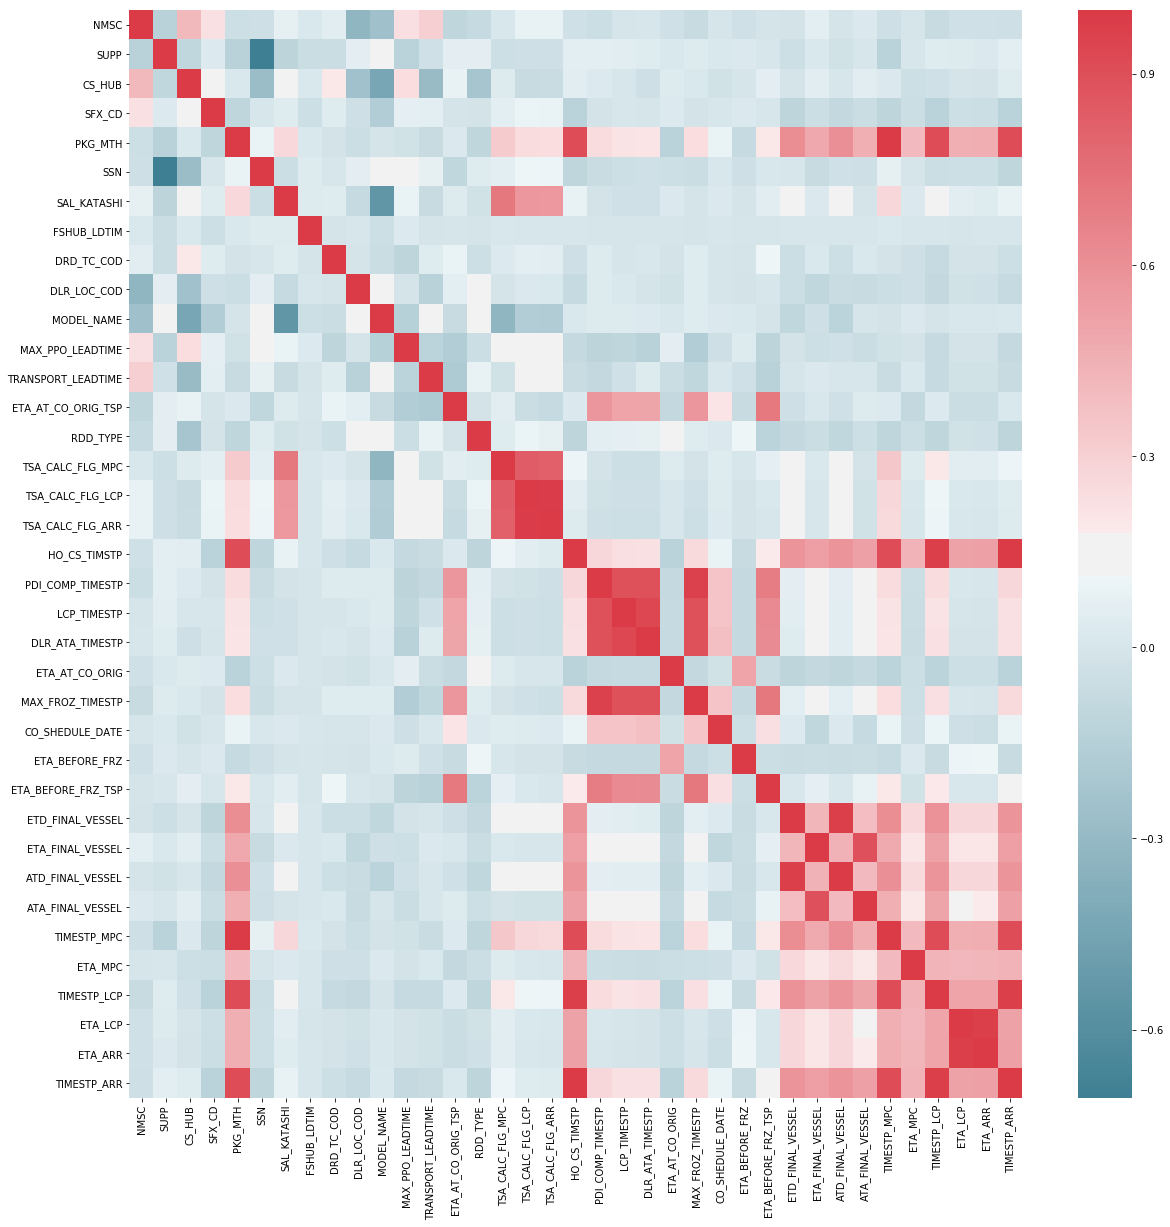

Would you like to increase the plot size for a clear view? - Y/NN




In [33]:
    
fig_size_x = 20
fig_size_y = 20

while(True):
        print("Plotting correlation between the features...")
        print('\n')
        
        halfHeatMap_corr(data,figsize_x=fig_size_x, figsize_y=fig_size_y)

        fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
        print('\n')

        if fig_size_change_ind =='Y':
            fig_size_x += 5
            fig_size_y += 5
        else:
            break

#input("Press enter to continue...")

In [34]:
data,target,target_is_separate_ind                     = separate_target(data,target_name)
drop_corr_ind=(input('Would you like to drop any of the highly correlated features? - Y/N')).upper()
print('\n')
if drop_corr_ind == 'Y':
    corr_threshold_ind = (input("Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.")).upper()
    print('\n')
    if corr_threshold_ind == 'Y':
        corr_threshold = float((input("Please refer to the correlation plot and specify a threshold of your choice.")))
        if (corr_threshold > 1 and corr_threshold < 0):
            corr_threshold = 0.95   
    else:
        corr_threshold = 0.95
    print('\n')
    
    corr_matrix = data.corr().abs()
    c1 = corr_matrix.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[(c1.values!=1) & (c1.values > corr_threshold)]#
    print("Below is the pair of highly correlated features excluding the target feature, whose correlation coefficient is greater than threshold:\n ",high_cor)
    print('\n')
    to_drop=[high_cor.index[i][0] for i in range(len(high_cor))]
    to_drop=list(set(to_drop))
    print("Here is the list of features that will be dropped..: ",to_drop)
    print('\n')
    
    donot_drop_ind=(input("Is there any feature in the list that you would want to retain? - Y/N")).upper()
    donot_drop = []
    if donot_drop_ind =='Y':
        print("Enter the features that you would like to reatin seaparated by commas : ")
        donot_drop=[x for x in input().split(',')]
        
    if donot_drop:
        for i in donot_drop:
            to_drop.remove(i)
            
    data.drop(to_drop,axis =1,inplace=True)
    if to_drop:
        print("List of features dropped is :", to_drop)
    else:
        print("None of the features were dropped")
        
print('\n')  
input("Press enter to continue...")
        

Would you like to drop any of the highly correlated features? - Y/NY


Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.Y


Please refer to the correlation plot and specify a threshold of your choice.0.90


Below is the pair of highly correlated features excluding the target feature, whose correlation coefficient is greater than threshold:
  TIMESTP_MPC       PKG_MTH             0.998633
TSA_CALC_FLG_ARR  TSA_CALC_FLG_LCP    0.980968
ETA_LCP           ETA_ARR             0.978508
ATD_FINAL_VESSEL  ETD_FINAL_VESSEL    0.977730
HO_CS_TIMSTP      TIMESTP_LCP         0.974777
MAX_FROZ_TIMESTP  PDI_COMP_TIMESTP    0.962326
LCP_TIMESTP       DLR_ATA_TIMESTP     0.939075
HO_CS_TIMSTP      TIMESTP_MPC         0.915998
PKG_MTH           HO_CS_TIMSTP        0.915330
TIMESTP_LCP       TIMESTP_MPC         0.914829
         

''

In [35]:
#Function tio obtain a threshold value for outlier removal
def get_outlier_threshold(df):
        
    Q1=df.quantile(0.25)#1st qaurtile 
    Q3=df.quantile(0.75)#3rd qaurtile
    
    IQR=Q3-Q1#Inter quartile range
    #print(Q3+1.5*IQR)
    
    #upper_threshold  = (Q3+1.5*IQR).mean()
    #lower_threshold  = (Q1-1.5*IQR).mean()
    upper_whisker = df[df<=Q3+1.5*IQR].max()
    lower_whisker = df[df>=Q1-1.5*IQR].min()
    
    upper_threshold_median  = upper_whisker.median()
    upper_threshold_mean    = upper_whisker.mean()
    upper_threshold_mode    = upper_whisker.mode()[0]
    
    lower_threshold_median  = lower_whisker.median()
    lower_threshold_mean    = lower_whisker.mean()
    lower_threshold_mode    = lower_whisker.mode()[0]  
    return (upper_threshold_median,lower_threshold_median,upper_threshold_mean,lower_threshold_mean,upper_threshold_mode,lower_threshold_mode)#return thresholds as a tuple
 

In [36]:
#Function to visualize outliers in the data
def plotoutliers(df,figsize_x=fig_size_x,figsize_y=fig_size_y):
    
    plt.figure(figsize=(figsize_x, figsize_y))#specify the size of the figure
    ax=sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True)#plot outliers
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)#rotate the labels so as to adjust space
    
    threshold = get_outlier_threshold(df)#obtain upper and lower threshold values 
   
    ax.axhline(y=max(threshold[0],threshold[2],threshold[4]), color='r',linestyle='--',label='Upper threshold')#plot upper threshold
    ax.axhline(y=min(threshold[1],threshold[3],threshold[5]), color='b',linestyle='--',label='Lower threshold')#plot lower threshold
    ax.legend(loc='upper right')#set legend

    plt.show()
    
    return threshold
    

In [37]:
#Function to drop rows which contain outliers
def remove_outliers(df,column,threshold,method):
    #Default method is to filter outliers on the basis of interquartile range as we need the data to be normally distributed to filter data based on standard deviation
    
    if method == 'IQR':

        Q1      = df[column].quantile(0.25)#1st qaurtile of the feature
        Q3      = df[column].quantile(0.75)#3rd quartile of the feature
        IQR     = Q3 - Q1#interquartile range

        df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
    
    if method =='threshold':
        
        df = df[~((df[column] < min(threshold[1],threshold[3],threshold[5])) |(df[column] > max(threshold[0],threshold[2],threshold[4])))]#remove data which is more than upper threshold and lesser than lower threshold
        
    if method == 'std':
        
        mean = df[column].mean()#mean of the feature
        std  = df[column].std()#standard deviation of the feature
        
        df = df[df[column] < (3*std + mean)]
        
    return df


In [38]:

fig_size_x = 20
fig_size_y = 20

chck_outlier = True
#to_drop=[]
while(chck_outlier == True):
    
    check_outlier = (input('Would you like to check for outliers in the data? - Y/N')).upper()
    if check_outlier == 'Y':
        
        out_cont_features = [i for i in continuous_features  if i not in to_drop+ [target_name]]
        out_cat_features  = [i for i in categorical_features if i not in to_drop+ [target_name]]

        if out_cont_features:
            loop_cont = True
            while(loop_cont==True):
                print("Plotting outliers for continuous features...")
                print('\n')

                #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
                threshold_cont = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)

                fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
                print('\n')

                if fig_size_change_ind =='Y':
                    fig_size_x += 5
                    fig_size_y += 5  
                else:
                    loop_cont = False

        if out_cat_features:
            loop_cat = True
            while(loop_cat == True):
                print("Plotting outliers for categorical features...")
                print('\n')

                #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
                threshold_cat = plotoutliers(data[out_cat_features],fig_size_x,fig_size_y)

                fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
                print('\n')

                if fig_size_change_ind =='Y':
                    fig_size_x += 5
                    fig_size_y += 5  
                else:
                    loop_cat = False

        loop_all = True  
        while(loop_all == True):
            print("Plotting outliers for all features...")
            print('\n')
            if not target_is_separate_ind:
                data,target,target_is_separate_ind                     = separate_target(data,target_name)
            threshold_all = plotoutliers(data,fig_size_x,fig_size_y)

            fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
            print('\n')

            if fig_size_change_ind =='Y':
                fig_size_x += 5
                fig_size_y += 5
            else:
                loop_all = False

        outlier_remove_ind =  (input("Would you like to remove any of the outliers? - Y/N")).upper()
        if outlier_remove_ind == 'Y':
            if target_is_separate_ind:
                data,target_is_separate_ind       = concatenate_target(data,target)
            invalid_col=True
            while(invalid_col==True):
                col_for_outlier = input("Please enter the feature based on which you would like to remove outliers :")
                print("\n")
                invalid_col_name = validate_columns(data,columnlist = [col_for_outlier])
                if invalid_col_name:
                    print('Warning!! Please verify the feature name and re-enter : ',invalid_col_name)
                    print('\n')
                else:
                    invalid_col=False
            print("Please specify whether you would remove outliers based on Inter quartile range, threshold value or standard deviation")
            removal_method = input("Enter any of these : IQR / threshold / std\n")
            print("\n")
            outlier_thrshld = threshold_all
            if removal_method == 'threshold':
                print("Outliers will be removed based on the displayed threshold of all features unless you would want to change")
                threshld_cat_cont_ind = (input('Would you like to set the threshold based on only continuous or categorical features? - Y/N')).upper()
                if threshld_cat_cont_ind == 'Y':
                    cat_or_cont = (input('Enter A/B for threshold based on continuous/categorical features respectively')).upper()
                    if cat_or_cont == 'A':
                        outlier_thrshld = threshold_cont       
                    elif cat_or_cont =='B':
                        outlier_thrshld = threshold_cat
                else:
                    outlier_threshold_ind = input("Would you like to specify the threshold values for outlier removal? - Y/N")
                    print("\n")
                    if outlier_threshold_ind == 'Y':
                        lower_threshold = input("Enter the lower threshold :")
                        upper_threshold = input("Enter the upper threshold :")
                        print("\n")
                        outlier_thrshld = (lower_threshold,upper_threshold)

            data = remove_outliers(data,column = col_for_outlier,threshold = outlier_thrshld,method = removal_method)
            print("Outliers are successfully removed..")
            print("\n")
        else:
             chck_outlier = False
    else:
         chck_outlier = False
        

    
input("Press enter to continue...")

Would you like to check for outliers in the data? - Y/NN
Press enter to continue...


''

In [40]:
#Function to plot and obtain feature importance
def feature_imp_plot(df,target,classification,figsize_x=10,figsize_y=25):
    
    #Use random forest with 100 estimators to decide important features
    if classification:
        rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 42)
    else:
        rnd_clf = RandomForestRegressor (n_estimators = 100,random_state = 42)
    
    rnd_clf.fit(df,target)#fit the model
    
    #obtain feature importance along with columns
    x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.columns), reverse = False)))
    #x=[((i-min(x))/(max(x)-min(x)))for i in x]#scale the importances between 0 and 1 for better visualization
    #x=[format(i,'.10f') for i in x]
    fi_df=pd.DataFrame(x,index=y,columns=['Importance'])#create dataframe of feature importance
    
    #plot feature importance
    plt.figure(figsize=(figsize_x, figsize_y))
    ax=plt.barh(np.arange(len(y)), x, align='center', alpha=0.5,color='g',log=True)
    ax=plt.yticks(np.arange(len(y)), y)
    ax=plt.xlabel('Importance')
    
    #for p in ax.patches:
        #plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    

    
    return fi_df


Plotting feature importance in log scale of importances...


Please specify if this is a regression problem or classification

Enter R for Regression or C for Classification : R


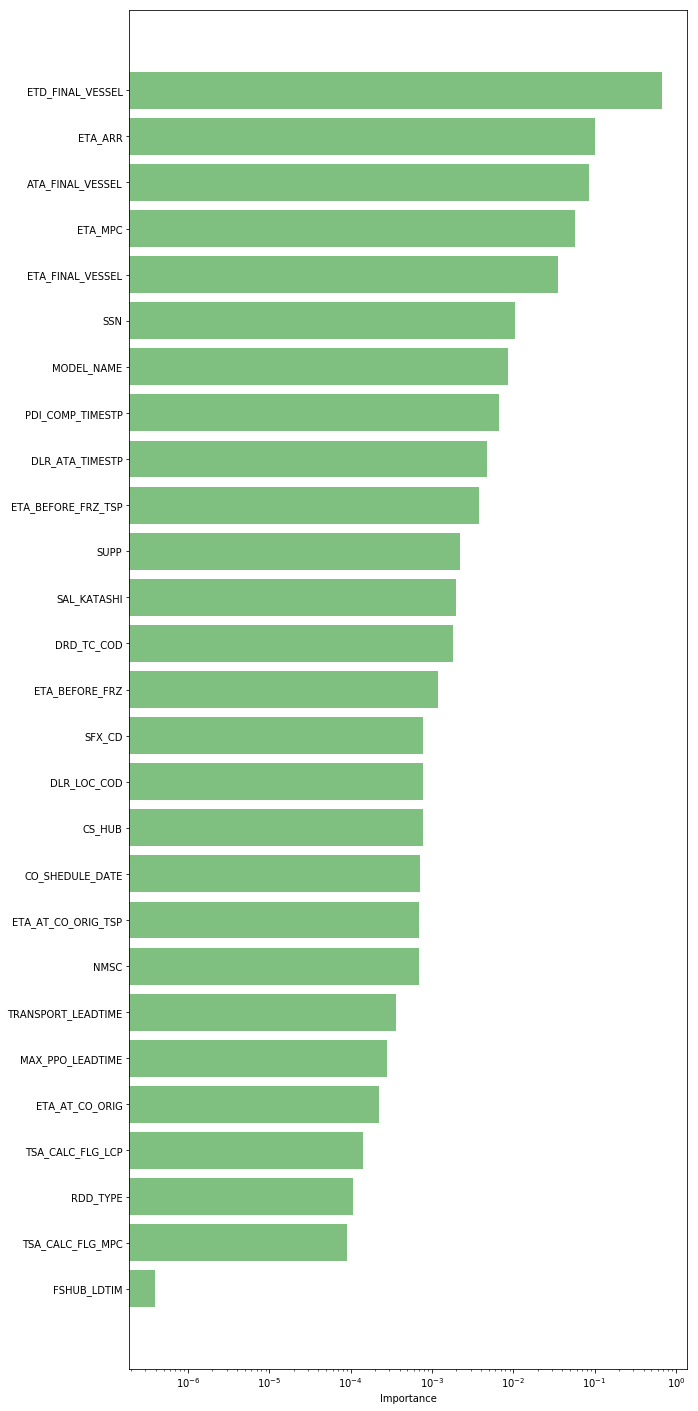

Below is the feature importance for every feature:
                       Importance
ETD_FINAL_VESSEL    6.754881e-01
ETA_ARR             9.984800e-02
ATA_FINAL_VESSEL    8.505246e-02
ETA_MPC             5.689735e-02
ETA_FINAL_VESSEL    3.557153e-02
SSN                 1.055110e-02
MODEL_NAME          8.493883e-03
PDI_COMP_TIMESTP    6.706158e-03
DLR_ATA_TIMESTP     4.737791e-03
ETA_BEFORE_FRZ_TSP  3.835150e-03
SUPP                2.222678e-03
SAL_KATASHI         1.988121e-03
DRD_TC_COD          1.820570e-03
ETA_BEFORE_FRZ      1.186859e-03
SFX_CD              7.862275e-04
DLR_LOC_COD         7.670726e-04
CS_HUB              7.660357e-04
CO_SHEDULE_DATE     7.062522e-04
ETA_AT_CO_ORIG_TSP  6.871322e-04
NMSC                6.831163e-04
TRANSPORT_LEADTIME  3.637398e-04
MAX_PPO_LEADTIME    2.764029e-04
ETA_AT_CO_ORIG      2.251331e-04
TSA_CALC_FLG_LCP    1.427421e-04
RDD_TYPE            1.057867e-04
TSA_CALC_FLG_MPC    9.025368e-05
FSHUB_LDTIM         3.906643e-07


In [41]:
print("Plotting feature importance in log scale of importances...")
print('\n')

print("Please specify if this is a regression problem or classification\n")
reg_or_class = (input("Enter R for Regression or C for Classification : ")).upper()

if reg_or_class == 'C':
    class_ind = True
else:
    class_ind = False

if not target_is_separate_ind:
    data,target,target_is_separate_ind                     = separate_target(data,target_name)

data_fi = feature_imp_plot(data,target=target,classification=class_ind)
plt.show()

print("Below is the feature importance for every feature:\n",data_fi.sort_values('Importance', ascending= False))


In [42]:
#Function to obtain the list of unimportant features by referring to feature importance plot and thereby setting threshold
def get_unimp_features(df,threshold):
    
    unimp_features_list = df[(df['Importance'].astype('float') < threshold)].index.values.tolist()
    
    return unimp_features_list
    

In [43]:
drop_features_ind = (input('Would you like to drop unimportant features? - Y/N')).upper()
print('\n')
if drop_features_ind == 'Y':
    fi_threshold = float(input('Please refer to the feature importance plot above and enter the threshold below which you would like to drop the features'))
    print('\n')
    unimp_features = get_unimp_features(data_fi,fi_threshold)
    print('Here is the list of unimportant features : ',unimp_features)
    print('\n')
    print('Dropping  all unimportant features ...')
    print('\n')
    data.drop(unimp_features,axis =1,inplace=True)
    print('Now let us take a look at our dataset with important features only!!\n ')
    display(data.head())
    

Would you like to drop unimportant features? - Y/NY


Please refer to the feature importance plot above and enter the threshold below which you would like to drop the features9.025368e-05


Here is the list of unimportant features :  ['FSHUB_LDTIM', 'TSA_CALC_FLG_MPC']


Dropping  all unimportant features ...


Now let us take a look at our dataset with important features only!!
 


,NMSC,SUPP,CS_HUB,SFX_CD,SSN,SAL_KATASHI,DRD_TC_COD,DLR_LOC_COD,MODEL_NAME,MAX_PPO_LEADTIME,...,DLR_ATA_TIMESTP,ETA_AT_CO_ORIG,CO_SHEDULE_DATE,ETA_BEFORE_FRZ,ETA_BEFORE_FRZ_TSP,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATA_FINAL_VESSEL,ETA_MPC,ETA_ARR
0,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.723618,0.333333,0.0,...,0.304058,0.023537,0.818452,0.023537,0.854376,0.291248,0.320458,0.323319,0.400000,0.433718
1,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.739252,0.333333,0.0,...,0.276653,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,0.433718
2,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.277921,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,0.433718
3,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.175371,0.023537,0.818452,0.023537,0.854385,0.291248,0.320458,0.323319,0.402878,0.433718
4,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.347826,0.724176,0.333333,0.0,...,0.614010,0.024284,0.571429,0.024284,0.877244,0.291248,0.320458,0.323319,0.402878,0.433718


In [44]:
##Function to reduce the number of features in the data
def dimreduction(df,reqd_dim):
    
    components_required=min(reqd_dim,len(df.columns)) #if number of features < 30, then reduce dimension to to number of features else to 30
    pca = PCA(n_components = components_required)
    principalComponents = pca.fit_transform(df.iloc[:,:].values)#converting data to array so as to fit
    principalDf = pd.DataFrame(data = principalComponents,index=df.index)#convert compressed data to dataframe
    
    return principalDf

In [45]:
dim_red_ind = (input('Would you like to reduce dimensions of the data? - Y/N')).upper()
if dim_red_ind == 'Y':
    no_of_comp = int(input('Please enter the number of dimensions that you would like to reduce to :'))
    data = dimreduction(data,reqd_dim = no_of_comp)
    print('Here is your compressed data..\n')
    display(data.head())

Would you like to reduce dimensions of the data? - Y/NN


In [46]:
data,target_is_separate_ind       = concatenate_target(data,target)

In [47]:
data.head()

,NMSC,SUPP,CS_HUB,SFX_CD,SSN,SAL_KATASHI,DRD_TC_COD,DLR_LOC_COD,MODEL_NAME,MAX_PPO_LEADTIME,...,ETA_AT_CO_ORIG,CO_SHEDULE_DATE,ETA_BEFORE_FRZ,ETA_BEFORE_FRZ_TSP,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATA_FINAL_VESSEL,ETA_MPC,ETA_ARR,TIMESTP_ARR
0,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.723618,0.333333,0.0,...,0.023537,0.818452,0.023537,0.854376,0.291248,0.320458,0.323319,0.400000,0.433718,2.458263e+06
1,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.739252,0.333333,0.0,...,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,0.433718,2.458264e+06
2,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,0.433718,2.458263e+06
3,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.023537,0.818452,0.023537,0.854385,0.291248,0.320458,0.323319,0.402878,0.433718,2.458264e+06
4,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.347826,0.724176,0.333333,0.0,...,0.024284,0.571429,0.024284,0.877244,0.291248,0.320458,0.323319,0.402878,0.433718,2.458263e+06


In [63]:
DropInd = (input('Would you like to drop any more columns from the list & take backup? Y/N : ')).upper()

if DropInd == 'Y':
    while(True):
        drop_null_column_list = []
        print('Enter the features you wish to drop, separated by comma :')
        drop_null_column_list = [x for x in input().split(',')]
        print('\n')

        if drop_null_column_list:
            invalid_col_names = validate_columns(data,columnlist = drop_null_column_list)
            if invalid_col_names:
                print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
                print('Please verify..')
                print('\n')
            else:
                break 

    df_backup = data[drop_null_column_list]
    data = drop_columns(data,columnlist=drop_null_column_list)
    print('Specified features are successfully dropped & backup taken in df_backup...')
    print('\n')
    print('Existing features in the dataset are: ', data.columns.tolist())
    print('\n')
    input('Press enter to continue')
else:
    input('Press enter to continue')
    
data.head()

Would you like to drop any more columns from the list & take backup? Y/N : N
Press enter to continue


,NMSC,SUPP,CS_HUB,SFX_CD,SSN,SAL_KATASHI,DRD_TC_COD,DLR_LOC_COD,MODEL_NAME,MAX_PPO_LEADTIME,...,PDI_COMP_TIMESTP,ETA_AT_CO_ORIG,CO_SHEDULE_DATE,ETA_BEFORE_FRZ,ETA_BEFORE_FRZ_TSP,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATA_FINAL_VESSEL,ETA_MPC,TIMESTP_ARR
0,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.723618,0.333333,0.0,...,0.738277,0.023537,0.818452,0.023537,0.854376,0.291248,0.320458,0.323319,0.400000,2.458263e+06
1,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.739252,0.333333,0.0,...,0.738186,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,2.458264e+06
2,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.738864,0.023537,0.818452,0.023537,0.854380,0.291248,0.320458,0.323319,0.401439,2.458263e+06
3,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.173913,0.719151,0.333333,0.0,...,0.738962,0.023537,0.818452,0.023537,0.854385,0.291248,0.320458,0.323319,0.402878,2.458264e+06
4,0.136364,1.0,0.0,0.559727,0.206897,0.14539,0.347826,0.724176,0.333333,0.0,...,0.853760,0.024284,0.571429,0.024284,0.877244,0.291248,0.320458,0.323319,0.402878,2.458263e+06


In [52]:
data.dtypes

NMSC                  float64
SUPP                  float64
CS_HUB                float64
SFX_CD                float64
SSN                   float64
SAL_KATASHI           float64
DRD_TC_COD            float64
DLR_LOC_COD           float64
MODEL_NAME            float64
MAX_PPO_LEADTIME      float64
TRANSPORT_LEADTIME    float64
ETA_AT_CO_ORIG_TSP    float64
RDD_TYPE              float64
TSA_CALC_FLG_LCP      float64
PDI_COMP_TIMESTP      float64
ETA_AT_CO_ORIG        float64
CO_SHEDULE_DATE       float64
ETA_BEFORE_FRZ        float64
ETA_BEFORE_FRZ_TSP    float64
ETD_FINAL_VESSEL      float64
ETA_FINAL_VESSEL      float64
ATA_FINAL_VESSEL      float64
ETA_MPC               float64
TIMESTP_ARR           float64
dtype: object

In [64]:
SplitInd = (input('Would you like to split the data in Train/Test? Y/N : ')).upper()

if SplitInd == 'Y':
    
    number = None
    while not number:
        s = input("Enter the test_size in two decimal float like 0.20: ")
        s = s.strip()
        string_number = s.split(".")
        if len(string_number[0]) != 1:
            print ("ERROR: Needs exactly one decimal point!")
            continue
        elif string_number[0] != '0':
            print ("ERROR: Need exactly zero before decimal point!")
            continue
        elif len(string_number[1]) != 2:
            print ("ERROR: Two numbers are required after decimal point!")
            continue
        try:
            number = float(s)
            break
        except ValueError:
            print("ERROR: Number is not valid!")

    print('Test size selected as ', number)
    
    datasplit = input('Enter R/C based on the type of split whether it is Regression/Classification problem : ')
    # Here the stratified shuffle split is done
    X = data.loc[:, data.columns != target.name]
    Y = data[target.name]
       
    if datasplit == 'R':
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=number, random_state=42, shuffle=True)
        print('Regression: Train-Test split done successfully using shuffle train_test_split.')
    elif datasplit == 'C':
        # have used 10 splits and test data proportion equal to 0.3
        sss= StratifiedShuffleSplit(n_splits=10, test_size=number, random_state=42)
        # equating the index of all the shuffled index to the data.
        for train_index, test_index in sss.split(X, Y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]            
            y_train, y_test = Y.iloc[train_index], Y.iloc[test_index] 
        print('Classification: Train-Test split done successfully using StratifiedShuffleSplit.')
    
    input('Enter to continue...')
    print ('Train shape => ', 'X_train : ', X_train.shape, '; y_train : ', y_train.shape)
    print ('Test shape  => ', 'X_test  : ', X_test.shape, '; y_test   : ', y_test.shape)

Would you like to split the data in Train/Test? Y/N : Y
Enter the test_size in two decimal float like 0.20: 0.20
Test size selected as  0.2
Enter R/C based on the type of split whether it is Regression/Classification problem : R
Regression: Train-Test split done successfully using shuffle train_test_split.
Enter to continue...
Train shape =>  X_train :  (24304, 23) ; y_train :  (24304,)
Test shape  =>  X_test  :  (6076, 23) ; y_test   :  (6076,)


In [58]:
cat_fea = data.columns.intersection(categorical_features).tolist()

try:
    cat_fea.remove(target_name)
    print('Target removed from categorical_features list!!')
except ValueError:
    pass

cat_fea

['NMSC',
 'SUPP',
 'CS_HUB',
 'SFX_CD',
 'SSN',
 'SAL_KATASHI',
 'DRD_TC_COD',
 'DLR_LOC_COD',
 'MODEL_NAME',
 'MAX_PPO_LEADTIME',
 'TRANSPORT_LEADTIME',
 'ETA_AT_CO_ORIG_TSP',
 'RDD_TYPE',
 'TSA_CALC_FLG_LCP']

In [59]:
target_name

'TIMESTP_ARR'

In [60]:
def get_dic_from_two_lists(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }

In [61]:
dic_cat_inp = ["categorical" for x in range(len(cat_fea))]

input_dic = get_dic_from_two_lists(cat_fea, dic_cat_inp)
output_dic = {target_name : 'output'}

col_desc = {**output_dic, **input_dic}
col_desc

{'TIMESTP_ARR': 'output',
 'NMSC': 'categorical',
 'SUPP': 'categorical',
 'CS_HUB': 'categorical',
 'SFX_CD': 'categorical',
 'SSN': 'categorical',
 'SAL_KATASHI': 'categorical',
 'DRD_TC_COD': 'categorical',
 'DLR_LOC_COD': 'categorical',
 'MODEL_NAME': 'categorical',
 'MAX_PPO_LEADTIME': 'categorical',
 'TRANSPORT_LEADTIME': 'categorical',
 'ETA_AT_CO_ORIG_TSP': 'categorical',
 'RDD_TYPE': 'categorical',
 'TSA_CALC_FLG_LCP': 'categorical'}

In [74]:
if datasplit == 'R':
    ml_predictor = aml.Predictor(type_of_estimator='regressor', column_descriptions=col_desc, verbose=True, name=None)
    model_names_list = ['GradientBoostingRegressor', 'LinearRegression', 'RandomForestRegressor', 'ExtraTreesRegressor', 
                        'XGBRegressor']
#    model_names_list = ['LinearRegression']
    print("Prepared parameters for Regressor Predictor")
elif datasplit == 'C':
    ml_predictor = aml.Predictor(type_of_estimator='classifier', column_descriptions=col_desc, verbose=True, name=None)
    model_names_list = ['GradientBoostingClassifier', 'LogisticRegression', 'RandomForestClassifier', 'ExtraTreesClassifier', 
                        'XGBClassifier']
#    model_names_list = ['LogisticRegression']
    print("Prepared parameters for Classifier Predictor")
else:
    print("Data split was neither based on Regression nor Classification. Please choose correctly!!")

Prepared parameters for Regressor Predictor


In [76]:
data_sample = data.sample(frac=0.01, replace=False, weights=None, random_state=42, axis=None)
print ("Sample Shape: ", data_sample.shape)
data_sample.head()

Sample Shape:  (304, 24)


,NMSC,SUPP,CS_HUB,SFX_CD,SSN,SAL_KATASHI,DRD_TC_COD,DLR_LOC_COD,MODEL_NAME,MAX_PPO_LEADTIME,...,PDI_COMP_TIMESTP,ETA_AT_CO_ORIG,CO_SHEDULE_DATE,ETA_BEFORE_FRZ,ETA_BEFORE_FRZ_TSP,ETD_FINAL_VESSEL,ETA_FINAL_VESSEL,ATA_FINAL_VESSEL,ETA_MPC,TIMESTP_ARR
27147,0.954545,0.000000,0.333333,0.620023,0.793103,0.890071,0.086957,0.433277,0.041667,0.000000,...,0.677206,0.030511,0.520833,0.015193,0.773278,0.751793,0.755365,0.755365,0.869065,2.458289e+06
21900,0.090909,0.666667,0.333333,0.854380,0.103448,0.985816,0.304348,0.088777,0.125000,0.000000,...,0.707700,0.019054,0.098214,0.019054,0.822822,0.704448,0.725322,0.725322,0.762590,2.458274e+06
22782,0.136364,0.166667,0.000000,0.580205,0.965517,0.414894,0.347826,0.859855,0.625000,0.454545,...,0.812910,0.007597,1.000000,0.034247,0.788166,0.444763,0.447783,0.447783,0.815827,2.458075e+06
1122,0.772727,1.000000,0.333333,0.324232,0.206897,0.127660,0.695652,0.168621,0.333333,0.000000,...,0.722081,0.011457,0.511905,0.011457,0.750400,0.715925,0.955651,0.955651,0.869065,2.458288e+06
3353,0.681818,0.500000,0.666667,0.959044,0.655172,0.606383,0.826087,0.393076,1.000000,0.000000,...,0.943750,0.000374,0.598214,0.000374,0.946526,0.520803,0.869814,0.912732,0.520863,2.458310e+06


In [80]:
ml_predictor.train(raw_training_data=data_sample, optimize_final_model=False, perform_feature_selection=True, verbose=True, 
                   ml_for_analytics=True, take_log_of_y=None, model_names=model_names_list, 
                   perform_feature_scaling=True, calibrate_final_model=False, verify_features=False, cv=5, 
                   feature_learning=False, fl_data=None, prediction_intervals=False)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Performing feature scaling
Fitting DataFrameVectorizer
Performing feature selection
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to run GridSearchCV on the pipeline f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.9s finished
C:\Users\sushant_singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1] random_holdout_set_from_training_data's score is: -52.631
[2] random_holdout_set_from_training_data's score is: -50.157
[3] random_holdout_set_from_training_data's score is: -47.353
[4] random_holdout_set_from_training_data's score is: -44.702
[5] random_holdout_set_from_training_data's score is: -42.477
[6] random_holdout_set_from_training_data's score is: -40.652
[7] random_holdout_set_from_training_data's score is: -38.953
[8] random_holdout_set_from_training_data's score is: -37.446
[9] random_holdout_set_from_training_data's score is: -36.008
[10] random_holdout_set_from_training_data's score is: -34.505
[11] random_holdout_set_from_training_data's score is: -33.226
[12] random_holdout_set_from_training_data's score is: -32.65
[13] random_holdout_set_from_training_data's score is: -31.722
[14] random_holdout_set_from_training_data's score is: -31.099
[15] random_holdout_set_from_training_data's score is: -30.202
[16] random_holdout_set_from_training_data's score is: -29.179
[1

C:\Users\sushant_singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sushant_singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sushant_singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=T

In [81]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
ml_predictor.train(raw_training_data=df_train, optimize_final_model=False, perform_feature_selection=True, verbose=True, 
                   ml_for_analytics=True, take_log_of_y=None, model_names='GradientBoostingRegressor', 
                   perform_feature_scaling=True, calibrate_final_model=False, verify_features=False, cv=2, 
                   feature_learning=False, fl_data=None, prediction_intervals=False)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Performing feature scaling
Fitting DataFrameVectorizer


In [ ]:
# Score the model on test data
test_score = ml_predictor.score(X_test, y_test)